# Paso 1: Importación de Librerías y Carga de Datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_excel("/content/Base final casos 1 y 3.xlsx")
df.head(10)

,id_cliente,edad,sexo,parroquia,n_visitas,gasto_total,ultima_visita,recencia,retorno,inmunologicas,generales,citologia,especiales,medicina_ocup
0,666099193,22,Masculino,Machachi,2,106.0,2023-04-01,487,Si,No,Si,No,No,No
1,1000850949,69,Femenino,Guamani,1,137.0,2024-07-22,9,No,No,Si,No,Si,No
2,1001012838,70,Femenino,Machachi,3,58.0,2023-04-19,469,Si,No,Si,Si,No,No
3,1003432364,30,Masculino,Machachi,2,160.5,2024-04-18,104,Si,Si,Si,No,Si,No
4,1003979737,22,Femenino,Aloag,1,10.0,2023-12-03,241,No,No,Si,No,Si,No
5,1051122750,2,Femenino,NaN,1,6.0,2024-01-23,190,No,No,Si,No,No,No
6,1101046298,76,Femenino,Machachi,1,216.0,2024-01-15,198,No,No,Si,No,Si,No
7,1101823456,75,Femenino,Machachi,1,99.0,2023-05-01,457,No,No,Si,No,No,No
8,1102267554,75,Masculino,NaN,1,10.0,2023-12-09,235,No,No,Si,No,No,No
9,1103631014,45,Femenino,Machachi,1,60.0,2023-08-11,355,No,No,Si,No,No,No


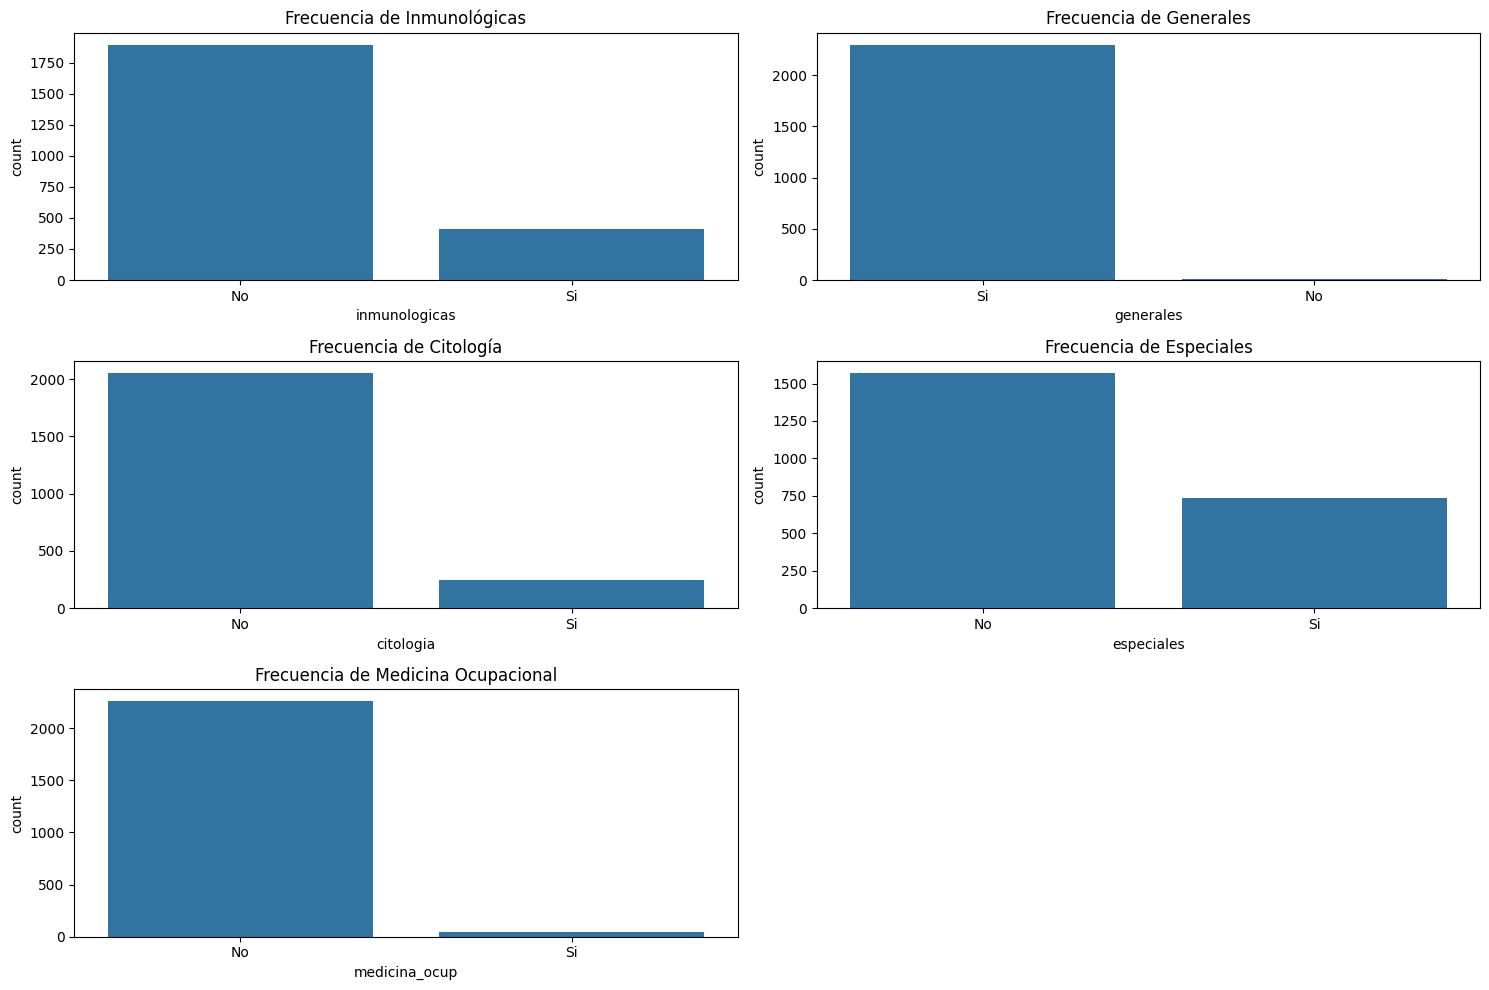

In [ ]:
# prompt: grafico de frecuencias de las variables en un solo cuadrado de 3x2  inmunologicas	generales	citologia	especiales	medicina_ocup

plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
sns.countplot(x='inmunologicas', data=df)
plt.title('Frecuencia de Inmunológicas')

plt.subplot(3, 2, 2)
sns.countplot(x='generales', data=df)
plt.title('Frecuencia de Generales')

plt.subplot(3, 2, 3)
sns.countplot(x='citologia', data=df)
plt.title('Frecuencia de Citología')

plt.subplot(3, 2, 4)
sns.countplot(x='especiales', data=df)
plt.title('Frecuencia de Especiales')

plt.subplot(3, 2, 5)
sns.countplot(x='medicina_ocup', data=df)
plt.title('Frecuencia de Medicina Ocupacional')

plt.tight_layout()
plt.show()

# Paso 2: Selección y Estandarización de Variables

Para que K-Means funcione correctamente, es útil escalar los datos, ya que las diferencias en las magnitudes pueden afectar el modelo. Vamos a usar StandardScaler para estandarizar las variables numéricas.

In [ ]:
# Seleccionar las columnas necesarias
segmentacion_datos = df[['edad', 'gasto_total', 'n_visitas']]

# Estandarizar las variables
scaler = StandardScaler()
segmentacion_datos_scaled = scaler.fit_transform(segmentacion_datos)

# Convertir el resultado a un DataFrame para facilidad de uso
segmentacion_datos_scaled = pd.DataFrame(segmentacion_datos_scaled, columns=['edad', 'gasto_total', 'n_visitas'])

# Verificar los datos estandarizados
segmentacion_datos_scaled.head()


,edad,gasto_total,n_visitas
0,-0.699345,0.842577,0.507806
1,1.360286,1.325428,-0.390500
2,1.404108,0.094937,1.406112
3,-0.348769,1.691460,0.507806
4,-0.699345,-0.652703,-0.390500


# Paso 3: Seleccionar el Número de Clústeres (k) con el Método del Codo

Primero, vamos a probar varios valores de
𝑘
 (cantidad de grupos) y utilizaremos el "método del codo" para encontrar el número óptimo. Esto se hace evaluando la inercia (una medida de qué tan bien los puntos están dentro de los clústeres) para diferentes valores de
𝑘
.

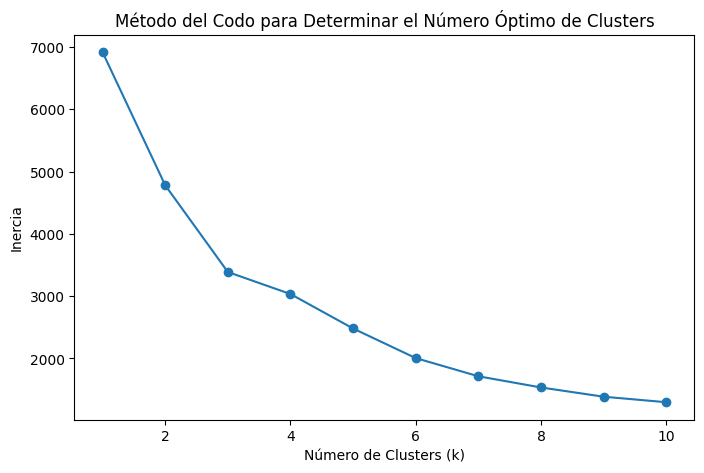

In [ ]:
# Usar el método del codo para determinar el número óptimo de clusters
inercia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(segmentacion_datos_scaled)
    inercia.append(kmeans.inertia_)

# Graficar la inercia para ver el "codo"
plt.figure(figsize=(8, 5))
plt.plot(k_range, inercia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.show()


Observando el gráfico, parece que el "codo" está alrededor de
𝑘
=
3
k=3 o
𝑘
=
4
k=4. Esto indica que uno de estos valores podría ser adecuado para segmentar los clientes.

Para seguir avanzando, probamos con
𝑘
=
3
k=3 primero. Esto nos permitirá ver cómo se agrupan los clientes en tres segmentos.

# Paso 4: Aplicar K-Means con 𝑘 = 3

Este paso entrenará el modelo y añadirá una columna al DataFrame que indicará el grupo al que pertenece cada cliente.

1. Este código entrena el modelo de K-Means y asigna cada cliente a uno de los tres grupos.
2. La columna cluster en el DataFrame df mostrará el grupo asignado a cada cliente.

In [ ]:
# Ajustar el modelo K-Means con k=3
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(segmentacion_datos_scaled)

# Verificar los primeros resultados
df[['edad', 'gasto_total', 'n_visitas', 'cluster']].head()


,edad,gasto_total,n_visitas,cluster
0,22,106.0,2,0
1,69,137.0,1,1
2,70,58.0,3,1
3,30,160.5,2,0
4,22,10.0,1,0


In [ ]:
print(kmeans.cluster_centers_, kmeans.inertia_)

[[-0.66647017 -0.28855392 -0.22103327]
 [ 1.02517054  0.0267312  -0.07135032]
 [ 0.55341076  2.58775558  2.49915487]] 3387.698759877688


# Paso 5: Visualización de los Clústeres

Dado que tenemos tres variables (edad, gasto_total, y n_visitas), una visualización útil es observar pares de variables y cómo se distribuyen en los clústeres.

Podemos usar gráficos de dispersión para ver cómo se agrupan en función de dos variables a la vez, coloreando los puntos según el clúster asignado.

1. Este código crea gráficos de dispersión para las combinaciones de las variables.

2. Cada punto representa un cliente y está coloreado según el clúster al que pertenece, lo que nos permite identificar patrones visuales entre los grupos.

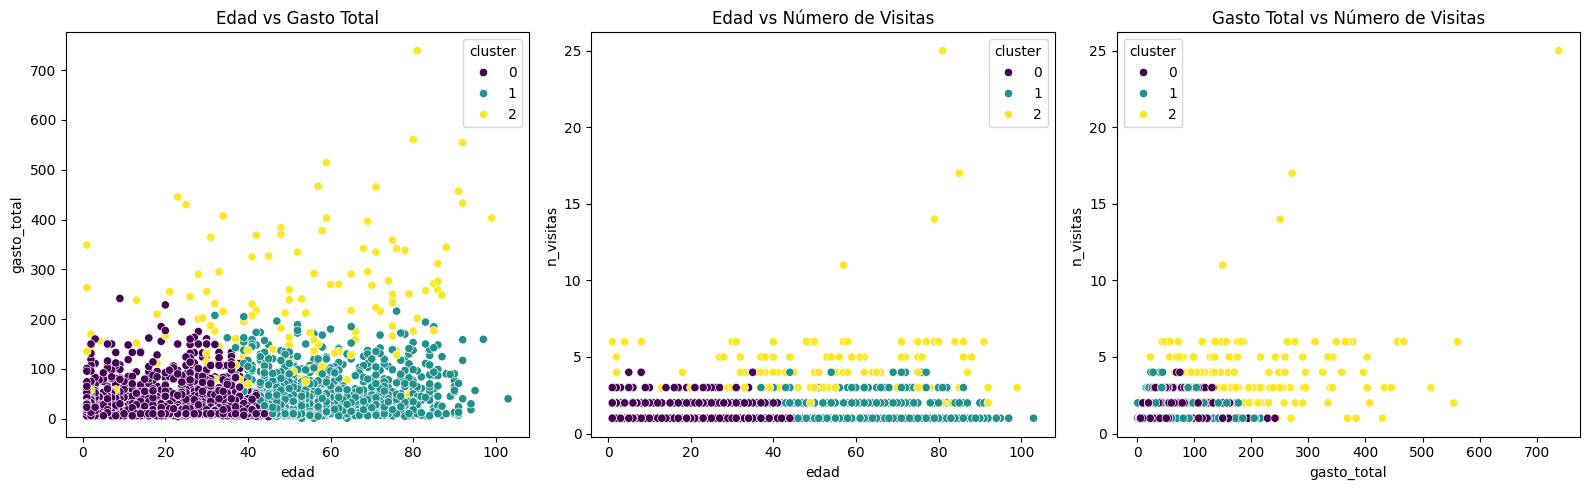

In [ ]:
# Visualizar los clústeres usando gráficos de dispersión
plt.figure(figsize=(16, 5))

# Gráfico Edad vs Gasto Total
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='edad', y='gasto_total', hue='cluster', palette='viridis')
plt.title('Edad vs Gasto Total')

# Gráfico Edad vs Número de Visitas
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='edad', y='n_visitas', hue='cluster', palette='viridis')
plt.title('Edad vs Número de Visitas')

# Gráfico Gasto Total vs Número de Visitas
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='gasto_total', y='n_visitas', hue='cluster', palette='viridis')
plt.title('Gasto Total vs Número de Visitas')

plt.tight_layout()
plt.show()


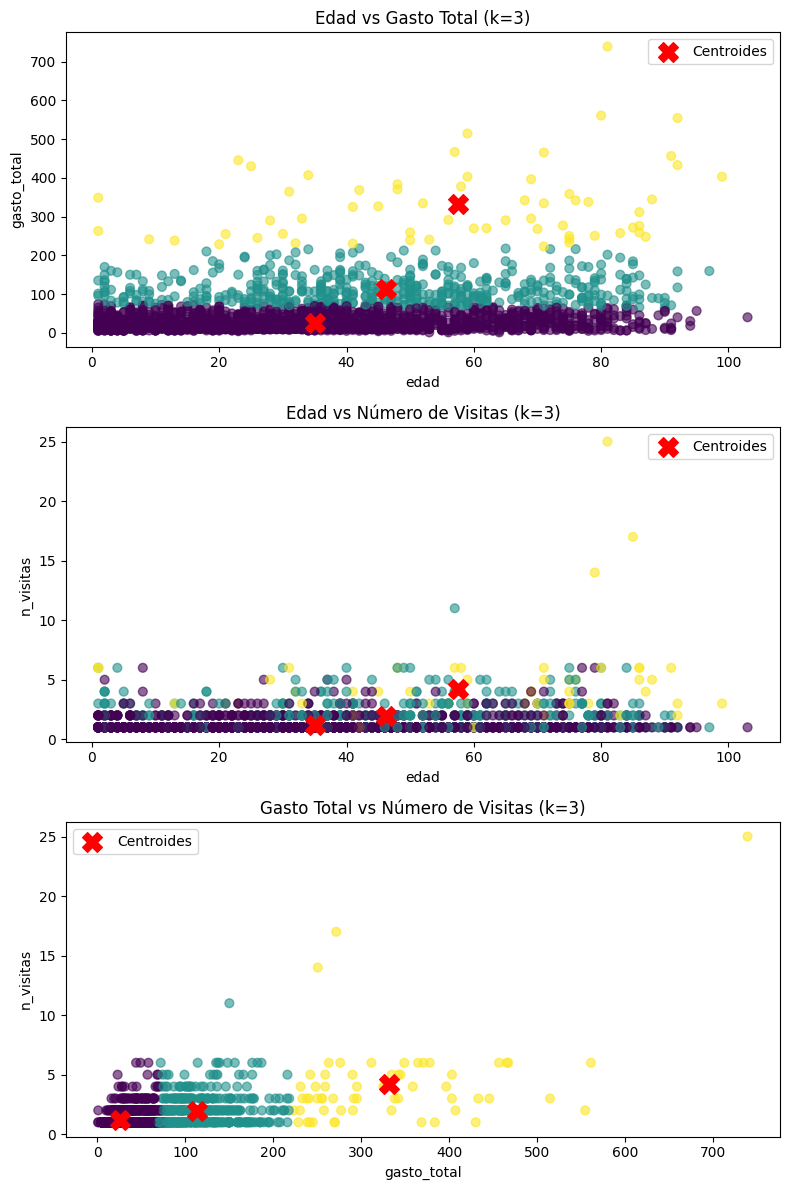

In [ ]:
from sklearn.cluster import KMeans

# Ajustar el modelo K-Means con k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['edad', 'gasto_total', 'n_visitas']])

# Extraer los nuevos centroides
centroides = kmeans.cluster_centers_

# Graficar los datos de dispersión con los clústeres y los nuevos centroides
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# Gráfico 1: Edad vs Gasto Total
axes[0].scatter(df['edad'], df['gasto_total'], c=df['cluster'], cmap='viridis', alpha=0.6, s=40)
axes[0].scatter(centroides[:, 0], centroides[:, 1], c='red', marker='X', s=200, label='Centroides')
axes[0].set_xlabel("edad")
axes[0].set_ylabel("gasto_total")
axes[0].set_title("Edad vs Gasto Total (k=3)")
axes[0].legend()

# Gráfico 2: Edad vs Número de Visitas
axes[1].scatter(df['edad'], df['n_visitas'], c=df['cluster'], cmap='viridis', alpha=0.6, s=40)
axes[1].scatter(centroides[:, 0], centroides[:, 2], c='red', marker='X', s=200, label='Centroides')
axes[1].set_xlabel("edad")
axes[1].set_ylabel("n_visitas")
axes[1].set_title("Edad vs Número de Visitas (k=3)")
axes[1].legend()

# Gráfico 3: Gasto Total vs Número de Visitas
axes[2].scatter(df['gasto_total'], df['n_visitas'], c=df['cluster'], cmap='viridis', alpha=0.6, s=40)
axes[2].scatter(centroides[:, 1], centroides[:, 2], c='red', marker='X', s=200, label='Centroides')
axes[2].set_xlabel("gasto_total")
axes[2].set_ylabel("n_visitas")
axes[2].set_title("Gasto Total vs Número de Visitas (k=3)")
axes[2].legend()

plt.tight_layout()
plt.show()
